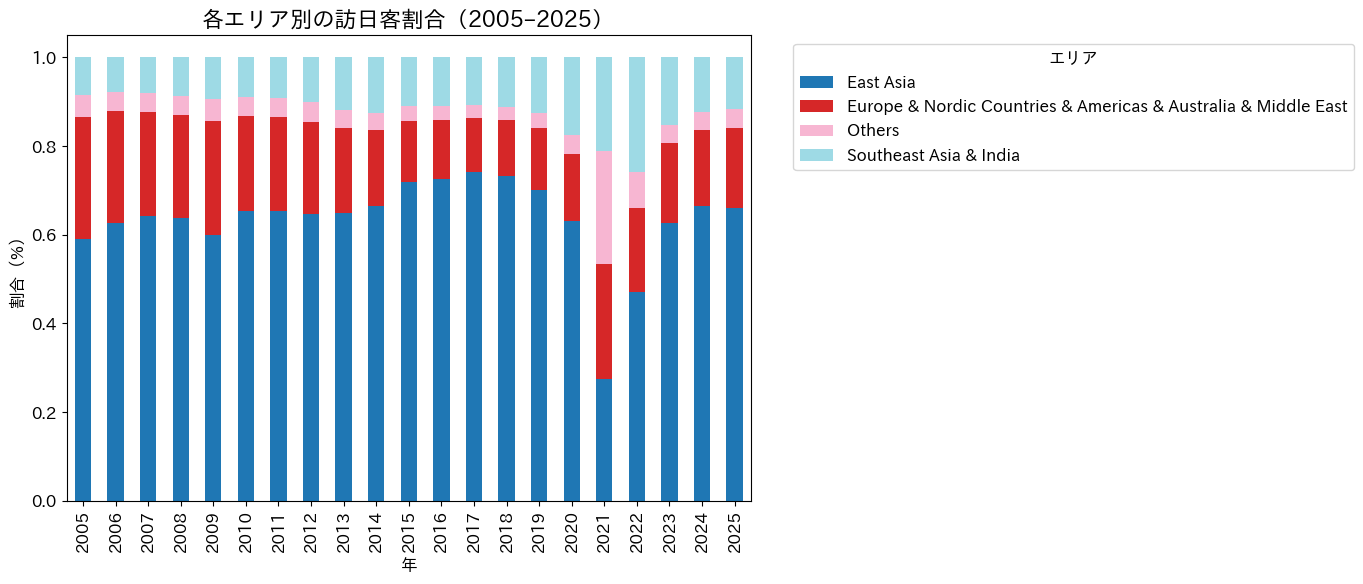

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 

plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False  # マイナス記号の文字化け防止

# データ読み込み
df = pd.read_csv("../data/jnto/visitor_all_2005_2025.csv")

# 集計：エリア別・年別の訪日客数合計
area_year = (
    df.groupby(["Year", "Area"])["Visitor_Arrivals"]
    .sum()
    .reset_index()
)

# 各年の総数で割って構成比を算出
area_year["Rate"] = area_year.groupby("Year")["Visitor_Arrivals"].transform(
    lambda x: x / x.sum()
)

# ピボットで年×エリアの表に
pivot = area_year.pivot(index="Year", columns="Area", values="Rate")

# スタックドバー（積み上げ棒グラフ）を描画
pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    colormap="tab20",
)

plt.title("各エリア別の訪日客割合（2005–2025）", fontsize=16)
plt.ylabel("割合（%）")
plt.xlabel("年")
plt.legend(title="エリア", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

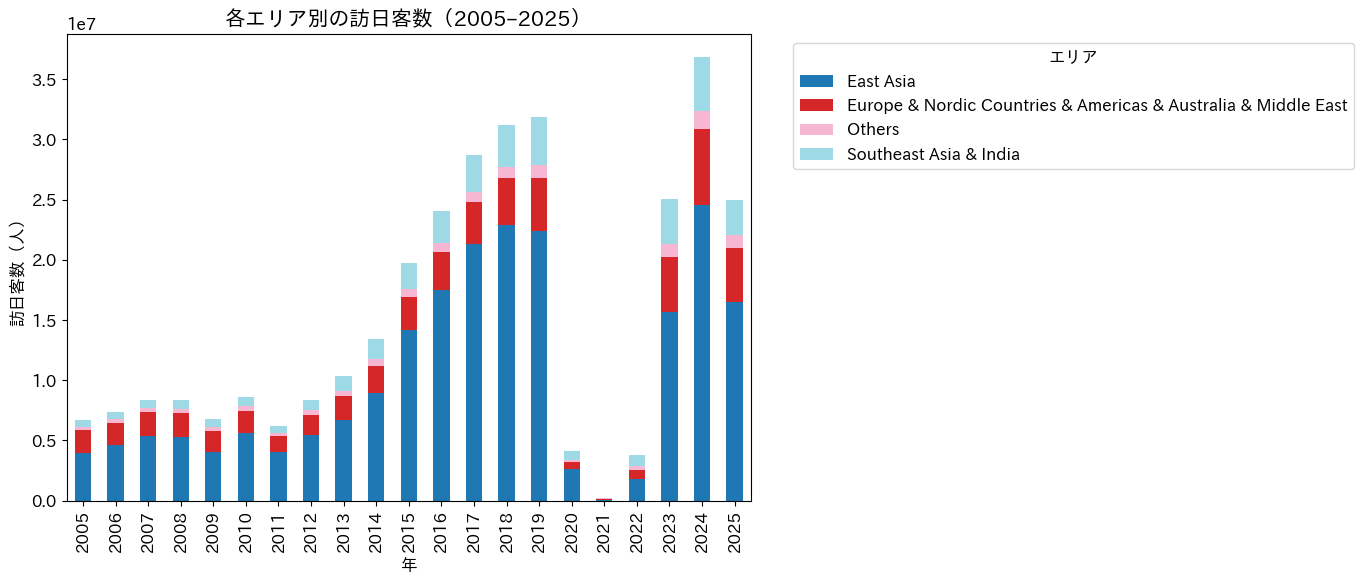

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False  # マイナス記号の文字化け防止

# CSV読み込み
df = pd.read_csv("../data/jnto/visitor_all_2005_2025.csv")

# 「Visitor Arrivals」列のカンマを削除して数値化
df["Visitor_Arrivals"] = df["Visitor_Arrivals"].replace(",", "", regex=True).astype(float)

# 年×エリアで訪日客数を合計
area_year = df.groupby(["Year", "Area"])["Visitor_Arrivals"].sum().reset_index()

# ピボット化：年をindex、エリアをcolumnsに
pivot = area_year.pivot(index="Year", columns="Area", values="Visitor_Arrivals")

# ---- 可視化 ----
pivot.plot(
    kind="bar",
    stacked=True,        # 積み上げで総数＋内訳を表現
    figsize=(14, 6),
    colormap="tab20"
)

plt.title("各エリア別の訪日客数（2005–2025）", fontsize=15)
plt.ylabel("訪日客数（人）")
plt.xlabel("年")
plt.legend(title="エリア", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 年ごとの総訪日客数
total_by_year = pivot.sum(axis=1)
max_year = total_by_year.idxmax()
max_value = total_by_year.max()

ax = pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    colormap="tab20"
)

# ---- y軸は「万人」などに省略して表示 ----
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}"))
plt.ylabel("訪日客数（100万人単位）")  # 単位を分かりやすく明記

# ---- グラフタイトル・凡例 ----
plt.title("各エリア別の訪日客数（2005–2025）", fontsize=15)
plt.xlabel("年")
plt.legend(title="エリア", bbox_to_anchor=(1.05, 1), loc="upper left")

# ---- 実測値注釈（カンマ区切り）----
ax.annotate(
    f"ピーク: {max_year}年\n{int(max_value):,}人",
    xy=(list(total_by_year.index).index(max_year), max_value),
    xytext=(list(total_by_year.index).index(max_year)-2, max_value*0.92),
    arrowprops=dict(facecolor="black", arrowstyle="->", lw=1),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()

NameError: name 'pivot' is not defined

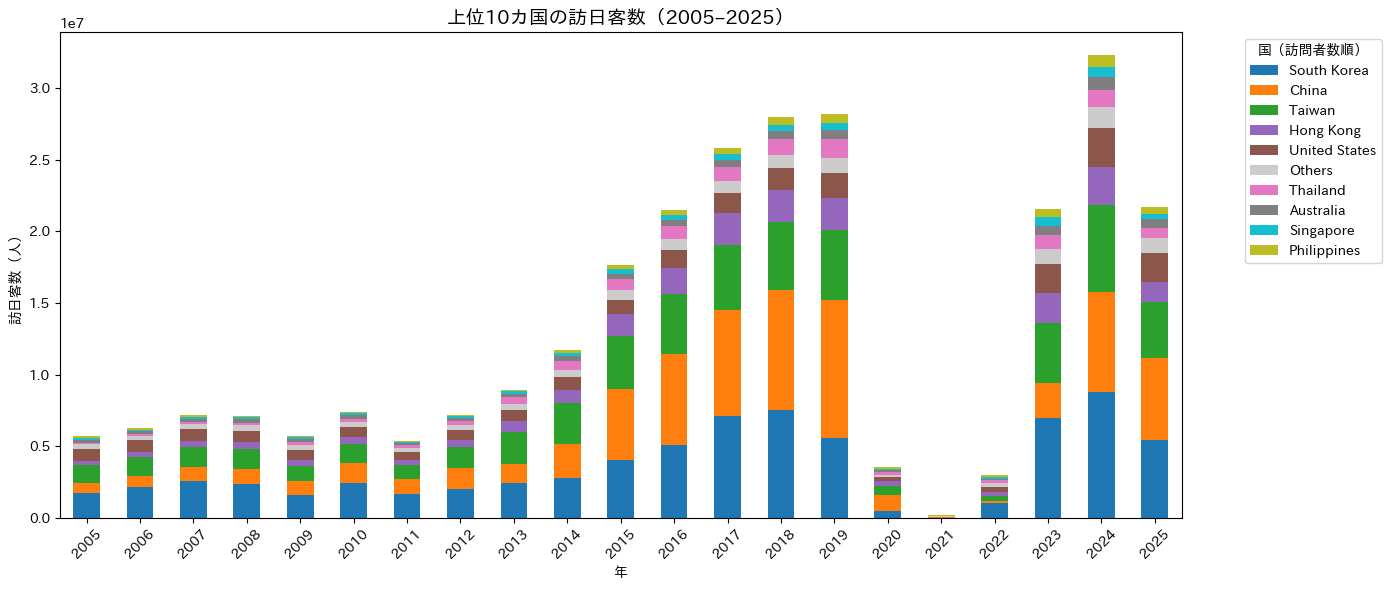

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv("../data/jnto/visitor_all_2005_2025.csv")
df["Visitor_Arrivals"] = (
    df["Visitor_Arrivals"].astype(str).str.replace(",", "").astype(float)
)

# 年ごと＋国ごとに集計
country_year = (
    df.groupby(["Year", "Country"])["Visitor_Arrivals"]
    .sum()
    .reset_index()
)

# 国別合計で並べ替え
total_by_country = (
    country_year.groupby("Country")["Visitor_Arrivals"]
    .sum()
    .sort_values(ascending=False)
)

# 上位10カ国のみ抽出
top10_countries = total_by_country.head(10).index.tolist()

# データを上位順にピボット（並び順固定！）
pivot_country = (
    country_year[country_year["Country"].isin(top10_countries)]
    .pivot(index="Year", columns="Country", values="Visitor_Arrivals")
    [top10_countries]  # ← 並び順を指定
)

# カスタムカラー（東アジア3国は明確に）
custom_colors = {
    "South Korea": "#1f77b4",  # 濃青
    "China": "#ff7f0e",         # 橙
    "Taiwan": "#2ca02c",        # 緑
    "Hong Kong": "#9467bd",     # 紫
    "United States": "#8c564b", # 茶
    "Thailand": "#e377c2",      # ピンク
    "Australia": "#7f7f7f",     # 灰
    "Singapore": "#17becf",     # 水色
    "Philippines": "#bcbd22",   # 黄緑
    "United Kingdom": "#d62728" # 赤
}

# 並び順に沿って色を対応付け
colors = [custom_colors.get(c, "#cccccc") for c in pivot_country.columns]

# プロット
plt.figure(figsize=(14, 6))
pivot_country.plot(kind="bar", stacked=True, ax=plt.gca(), color=colors)

plt.title("上位10カ国の訪日客数（2005–2025）", fontsize=14)
plt.ylabel("訪日客数（人）")
plt.xlabel("年")
plt.xticks(rotation=45)
plt.legend(
    title="国（訪問者数順）",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    labels=top10_countries,  # ← 凡例も上位順に固定
)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv("../data/jnto/visitor_all_2005_2025.csv")
print(df.columns.tolist())

['Area', 'Country', 'Month_abbr', 'Year', 'Rate', 'Visitor_Arrivals', 'Month']
